# Table of contents

## Step 1: Importing libraries and data
### Importing libraries
### Importing data

## Step 2: Creating a bar chart, histogram, scatterplot and line chart as per lesson instructions
### Bar chart on number of orders per day of the week
### Histogram I of prices
### Scatterplot of prices
### Histogram II of prices
### Line chart visualising prices of products ordered across the week
#### Creating a representative sample of df
#### Creating line charts
### Exporting visualisations

## Step 3: Histogram to show how orders are distributed throughout the day

## Step 4: Bar chart to show distribution of customers in terms of loyalty

## Step 5: Line chart visualising prices of products ordered across the day

## Step 7.1: Checking for a connection between age and family situation (defined in terms of number of dependants)

## Step 7.2: Checking for a connection between age and spending power (defined in terms of income)

## Exporting visualisations from steps 3-7

# Step 1: Importing libraries and data

## Importing libraries

In [1]:
# Importing pandas, NumPy, os, matplotlib, seaborn, and scipy
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

## Importing data

In [2]:
# Defining path variable
path = r'/Users/DanielaDietmayr/Library/CloudStorage/OneDrive-Personal/2023-01-18 Instacart basket analysis'

In [3]:
# Importing merged data on orders, products, departments, and customers as df
df = pd.read_pickle(os.path.join(path, '02 Data', '02 Prepared data', 'ords_prods_cust_deps.pkl'))

In [4]:
# Changing pandas options to display all columns in a dataframe
pd.options.display.max_columns = None

In [5]:
# Checking top rows of df
df.head()

,department_id,department,product_id,product_name,aisle_id,prices,order_id,user_id,order_number,order_day_of_the_week,order_hour_of_day,days_since_prior_order,add_to_cart_order,reordered,price_range_loc,Busiest_day,Busiest_days,Busiest_period_of_day,maximum_orders,loyalty_flag,average_price_for_user,spending_flag,median_days_since_prior_order,order_frequency_flag,first_name,surname,gender,state,age,n_dependants,fam_status,income
0,1,frozen,4,Smart Ones Classic Favorites Mini Rigatoni Wit...,38,10.5,2563211,1677,1,5,13,0.0,9,0,Mid-range product,Regularly busy,Average busy days,Average orders,21,Regular customer,7.47101,Low spender,13.0,Regular customer,Tom,White,Male,Utah,57,2,married,101071
1,1,frozen,311,Naturals Savory Turkey Breakfast Sausage,52,3.5,2135223,1677,18,4,22,4.0,10,0,Low-range product,Least busy,Least busy two days,Average orders,21,Regular customer,7.47101,Low spender,13.0,Regular customer,Tom,White,Male,Utah,57,2,married,101071
2,1,frozen,311,Naturals Savory Turkey Breakfast Sausage,52,3.5,2660694,1677,19,6,13,16.0,15,1,Low-range product,Regularly busy,Average busy days,Average orders,21,Regular customer,7.47101,Low spender,13.0,Regular customer,Tom,White,Male,Utah,57,2,married,101071
3,1,frozen,2452,Naturals Chicken Nuggets,129,11.0,1050238,1677,14,6,0,10.0,16,0,Mid-range product,Regularly busy,Average busy days,Average orders,21,Regular customer,7.47101,Low spender,13.0,Regular customer,Tom,White,Male,Utah,57,2,married,101071
4,1,frozen,2452,Naturals Chicken Nuggets,129,11.0,2149917,1677,16,5,18,11.0,9,1,Mid-range product,Regularly busy,Average busy days,Average orders,21,Regular customer,7.47101,Low spender,13.0,Regular customer,Tom,White,Male,Utah,57,2,married,101071


In [6]:
# Checking dimensions of df
df.shape

(32404859, 32)

In [7]:
# Getting basic info on df
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32404859 entries, 0 to 32404858
Data columns (total 32 columns):
 #   Column                         Dtype  
---  ------                         -----  
 0   department_id                  int64  
 1   department                     object 
 2   product_id                     int64  
 3   product_name                   object 
 4   aisle_id                       int64  
 5   prices                         float64
 6   order_id                       int64  
 7   user_id                        int64  
 8   order_number                   int64  
 9   order_day_of_the_week          int64  
 10  order_hour_of_day              int64  
 11  days_since_prior_order         float64
 12  add_to_cart_order              int64  
 13  reordered                      int64  
 14  price_range_loc                object 
 15  Busiest_day                    object 
 16  Busiest_days                   object 
 17  Busiest_period_of_day          object 
 18  

# Step 2: Creating a bar chart, histogram, scatterplot and line chart as per lesson instructions

## Bar chart on number of orders per day of the week
0 = Saturday, 1 = Sunday, 2 = Monday, 3 = Tuesday, 4 = Wednesday, 5 = Thursday, 6 = Friday

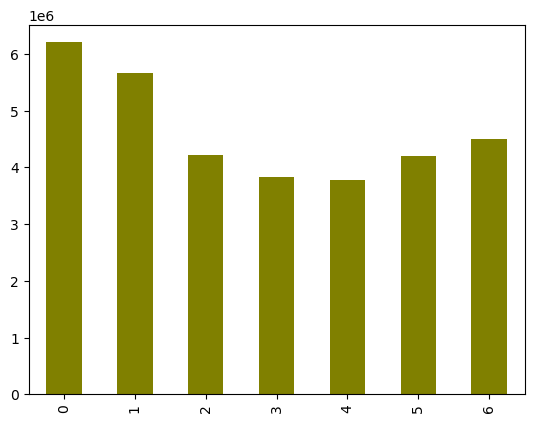

In [8]:
# Creating a bar chart with chronologically sorted bars
bar_order_dow = df['order_day_of_the_week'].value_counts().sort_index().plot.bar(color = 'olive')

Weekdays (2-6) are less busy than weekends (0-1).

## Histogram I of prices
Prices of products will be divided into 70 bins to show how prices are distributed.

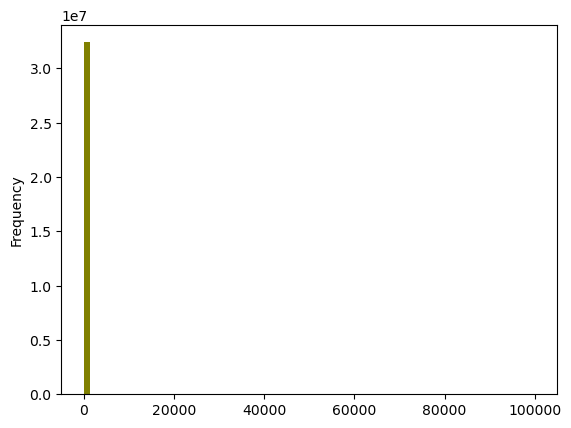

In [9]:
# Creating a histogram for prices with 70 bins
hist_prices = df['prices'].plot.hist(bins=70, color = 'olive')

The histogram does not provide much insight due to outliers. A scatterplot will help idetify them before the histogram will be re-created.

## Scatterplot of prices

In [10]:
# Checking descriptive stats for prices
df['prices'].describe()

count    3.240486e+07
mean     1.198023e+01
std      4.956554e+02
min      1.000000e+00
25%      4.200000e+00
50%      7.400000e+00
75%      1.130000e+01
max      9.999900e+04
Name: prices, dtype: float64

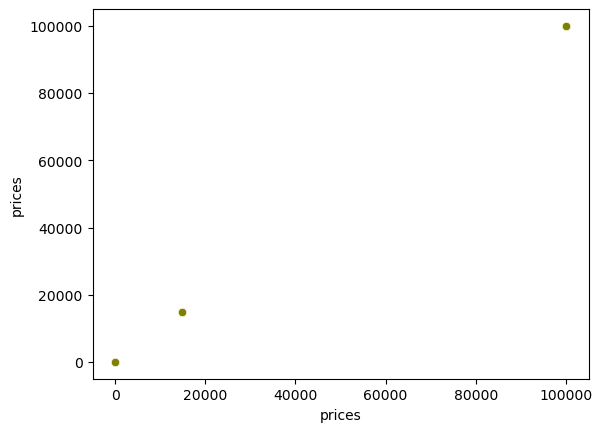

In [11]:
# Creating a scatterplot for prices to identify outliers
scatter_prices = sns.scatterplot(x='prices', y='prices', data=df, color='olive')

In [12]:
# Checking for products more expensive than 100$
df.loc[df['prices'] > 100]

,department_id,department,product_id,product_name,aisle_id,prices,order_id,user_id,order_number,order_day_of_the_week,order_hour_of_day,days_since_prior_order,add_to_cart_order,reordered,price_range_loc,Busiest_day,Busiest_days,Busiest_period_of_day,maximum_orders,loyalty_flag,average_price_for_user,spending_flag,median_days_since_prior_order,order_frequency_flag,first_name,surname,gender,state,age,n_dependants,fam_status,income
25815,16,dairy eggs,21553,Lowfat 2% Milkfat Cottage Cheese,108,14900.0,2651636,146079,4,2,13,8.0,2,0,High-range product,Regularly busy,Average busy days,Average orders,17,Regular customer,79.400000,High spender,7.0,Frequent customer,Scott,Webster,Male,Indiana,71,2,married,543925
38518,16,dairy eggs,21553,Lowfat 2% Milkfat Cottage Cheese,108,14900.0,156913,201725,12,4,13,3.0,10,0,High-range product,Least busy,Least busy two days,Average orders,56,Loyal customer,111.735664,High spender,3.0,Frequent customer,Jack,Bryan,Male,Maine,52,2,married,221333
38519,16,dairy eggs,21553,Lowfat 2% Milkfat Cottage Cheese,108,14900.0,666773,201725,17,3,10,5.0,24,1,High-range product,Regularly busy,Least busy two days,Most orders,56,Loyal customer,111.735664,High spender,3.0,Frequent customer,Jack,Bryan,Male,Maine,52,2,married,221333
38520,16,dairy eggs,21553,Lowfat 2% Milkfat Cottage Cheese,108,14900.0,1955425,201725,24,2,9,3.0,6,1,High-range product,Regularly busy,Average busy days,Average orders,56,Loyal customer,111.735664,High spender,3.0,Frequent customer,Jack,Bryan,Male,Maine,52,2,married,221333
38521,16,dairy eggs,21553,Lowfat 2% Milkfat Cottage Cheese,108,14900.0,1342881,201725,27,1,12,3.0,8,1,High-range product,Regularly busy,Busiest two days,Average orders,56,Loyal customer,111.735664,High spender,3.0,Frequent customer,Jack,Bryan,Male,Maine,52,2,married,221333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32332423,16,dairy eggs,33664,2 % Reduced Fat Milk,84,99999.0,2489526,106089,1,5,17,0.0,4,0,High-range product,Regularly busy,Average busy days,Average orders,3,New customer,6257.125000,High spender,6.0,Frequent customer,Alan,Davidson,Male,District of Columbia,57,1,married,215116
32333995,16,dairy eggs,21553,Lowfat 2% Milkfat Cottage Cheese,108,14900.0,281789,128321,1,0,10,0.0,1,0,High-range product,Busiest day,Busiest two days,Most orders,3,New customer,1866.862500,High spender,0.0,Frequent customer,Maria,Reilly,Female,California,52,1,married,428346
32336956,16,dairy eggs,21553,Lowfat 2% Milkfat Cottage Cheese,108,14900.0,2904073,155365,3,4,14,30.0,1,0,High-range product,Least busy,Least busy two days,Average orders,4,New customer,967.780645,High spender,15.0,Regular customer,Justin,Maldonado,Male,Louisiana,35,3,married,92091
32336957,16,dairy eggs,21553,Lowfat 2% Milkfat Cottage Cheese,108,14900.0,1149556,155365,4,5,19,15.0,9,1,High-range product,Regularly busy,Average busy days,Average orders,4,New customer,967.780645,High spender,15.0,Regular customer,Justin,Maldonado,Male,Louisiana,35,3,married,92091


Items with unrealistic prices of 99.999$ and 14.900$ will be set to NaN.

In [13]:
# Setting prices equal to or above 14.900$ to NaN
df.loc[df['prices'] >= 14900, 'prices'] = np.nan

In [14]:
# Checking maximum price in df
df['prices'].max()

25.0

## Histogram II of prices

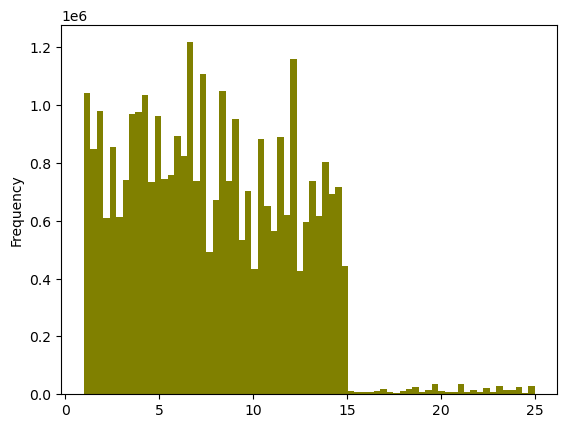

In [15]:
# Creating a histogram for prices with 70 bins
hist_prices2 = df['prices'].plot.hist(bins=70, color = 'olive')

Most products have prices up to 15$. The number of products with prices up to 25$ is considerably lower. 

## Line chart visualising prices of products ordered across the week

### Creating a representative sample of df

In [16]:
# Creating a list dev to split df 70/30
np.random.seed(5)
dev = np.random.rand(len(df)) <= 0.7

In [17]:
# Splitting df into two reprensentative samples 
df_30 = df[~dev]
df_70 = df[dev]

In [18]:
# Checking accuracy of split dataframe
len(df) == len(df_30)+len(df_70)

True

In [19]:
# Subsetting samples to contain only columns order_day_of_the_week and prices
df_30_sub = df_30[['order_day_of_the_week', 'prices']]
df_70_sub = df_70[['order_day_of_the_week', 'prices']]

### Creating line charts

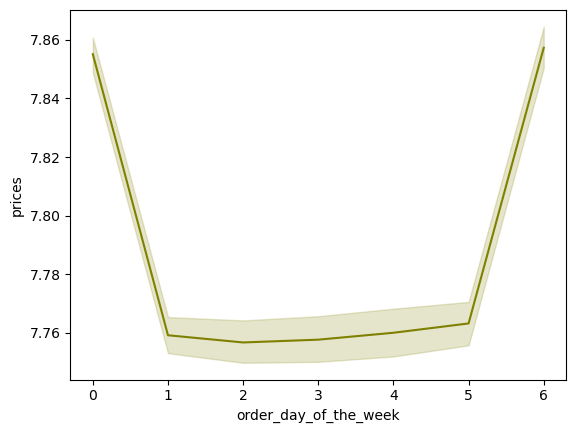

In [20]:
# Line chart with df_30_sub
line_prices_30 = sns.lineplot(data=df_30_sub, x='order_day_of_the_week', y='prices', color='olive')

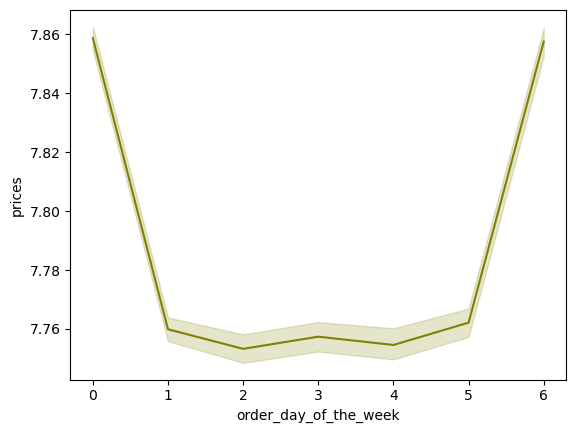

In [21]:
# Line chart with df_70_sub
line_prices_70 = sns.lineplot(data=df_70_sub, x='order_day_of_the_week', y='prices', color='olive')

While the line charts created from the 70/30 of the dataframe do differ, they can still be considered representative. They visualise a general tendency of slightly higher priced products (slightly means approx. 10 Cents!) bought on Fridays and Saturdays.

## Exporting visualisations

In [22]:
bar_order_dow.figure.savefig(os.path.join(path, '04 Analysis', '02 Visualisations', 'bar_order_dow.png'))
hist_prices2.figure.savefig(os.path.join(path, '04 Analysis', '02 Visualisations', 'hist_prices.png'))
line_prices_70.figure.savefig(os.path.join(path, '04 Analysis', '02 Visualisations', 'line_prices.png'))

# Step 3: Histogram to show how orders are distributed throughout the day

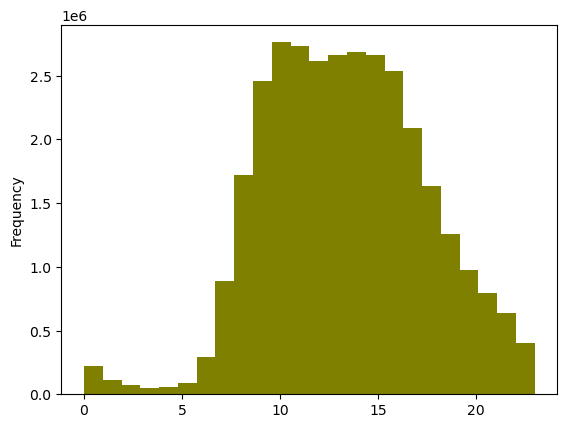

In [23]:
hist_order_hour_of_day = df['order_hour_of_day'].plot.hist(bins=24, color='olive')

In the morning hours, the number of orders is lowest. The number of orders starts to increase slowly after 5am. It reaches a first peak at 11am followed by a slight drop and a second, lower peak at 3pm. The core time for orders to be placed is between 9am and 7-8pm.

# Step 4: Bar chart to show distribution of customers in terms of loyalty
Reminder: 
"Loyal customers" have a maximum number of orders over 40. 
"Regular customers" hava a maximum number of orders over 10 but less than or equal to 40.
"New customers" have a maximum number of orders of less than or equal to 10.

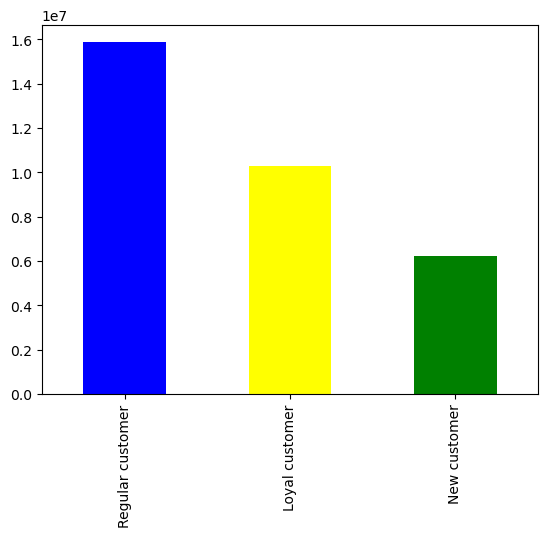

In [24]:
bar_loyalty = df['loyalty_flag'].value_counts().plot.bar(color=['blue', 'yellow', 'green'])

Most customers, i.e. almost 50%, are regular customers followed by loyal customers who make up the second largest group. 

# Step 5: Line chart visualising prices of products ordered across the day

In [25]:
# Creating subsets of samples created earlier with only relevant columns
df_30_sub2 = df_30[['order_hour_of_day', 'prices']]
df_70_sub2 = df_70[['order_hour_of_day', 'prices']]

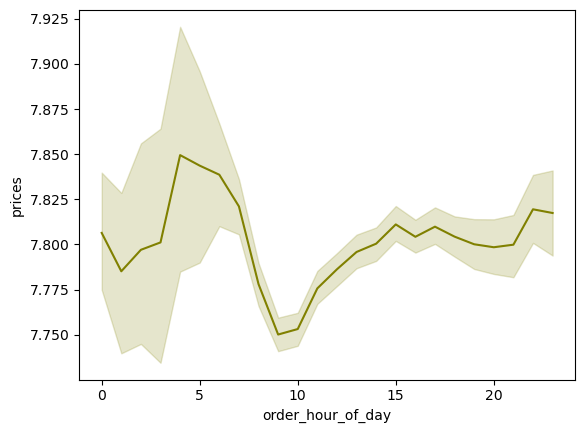

In [26]:
# Creating line chart with df_30_sub2
line_prices_hour_30 = sns.lineplot(data=df_30_sub2, x='order_hour_of_day', y='prices', color='olive')

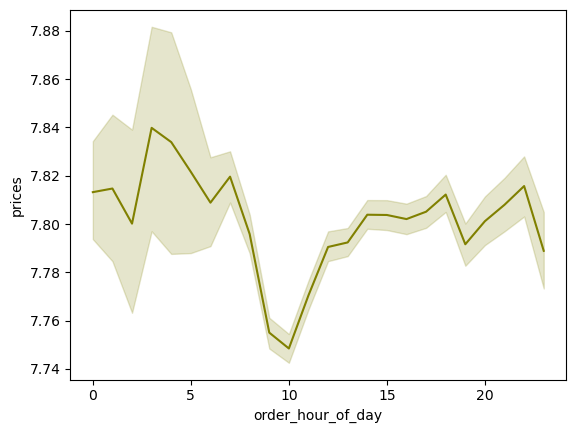

In [27]:
# Creating line chart with df_70_sub2
line_prices_hour_70 = sns.lineplot(data=df_70_sub2, x='order_hour_of_day', y='prices', color='olive')

Higher-priced products are ordered after midnight until ca. 3-4am. After that, prices of products ordered drop until 10am. From 10am, they rise steadily until ca. 9-10pm with a slight dip at ca. 7pm.

# Step 7.1: Checking for a connection between age and family situation (defined in terms of number of dependants)

In [28]:
# Creating a subset of df with only relevant columns
df_sub = df[['age', 'n_dependants']]

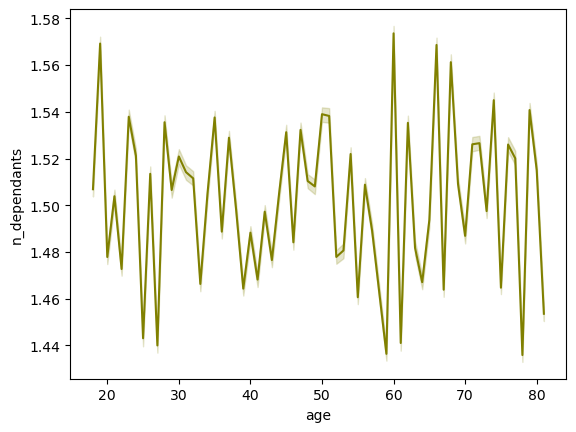

In [29]:
# Creating line chart
line_age_fam_situation = sns.lineplot(data=df_sub, x='age', y='n_dependants', color='olive')

There is no clear connection between age and family situation of customers.

# Step 7.2: Checking for a connection between age and spending power (defined in terms of income)

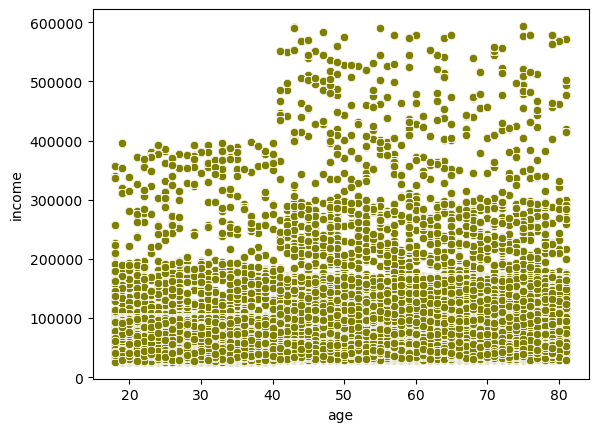

In [30]:
# Creating a scatterplot
scatter_age_income = sns.scatterplot(x='age', y='income', data=df, color='olive')

While the scatterplot does not indicate a very clear connection between age and income such as with increasing age, income increases, too, it does suggest that customers below an age of 40 don't have an income higher than 400.000$. The scatterplot also shows that most customers, irrespective of age, have an income of up to ca. 200.000$ as the density of dots in the scatterplot decreases from 200.000$. 

# Exporting visualisations from steps 3-7

In [31]:
# Exporting visualisations
hist_order_hour_of_day.figure.savefig(os.path.join(path, '04 Analysis', '02 Visualisations', 'hist_order_hour_of_day.png'))
bar_loyalty.figure.savefig(os.path.join(path, '04 Analysis', '02 Visualisations', 'bar_loyalty.png'))
line_prices_hour_30.figure.savefig(os.path.join(path, '04 Analysis', '02 Visualisations', 'line_prices_hour_30.png'))
line_prices_hour_70.figure.savefig(os.path.join(path, '04 Analysis', '02 Visualisations', 'line_prices_hour_70.png'))
line_age_fam_situation.figure.savefig(os.path.join(path, '04 Analysis', '02 Visualisations', 'line_age_fam_situation.png'))
scatter_age_income.figure.savefig(os.path.join(path, '04 Analysis', '02 Visualisations', 'scatter_age_income.png'))